# Eigenvector analysis

In [1]:
import os
import pickle
import sys
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import proplot as pplt
from ipywidgets import interact
from ipywidgets import widgets

sys.path.append("/home/46h/repo/psdist/")
import psdist as ps
import psdist.visualization as psv

In [2]:
pplt.rc["cycle"] = "538"
pplt.rc["cmap.discrete"] = False
pplt.rc["cmap.sequential"] = "viridis"
pplt.rc["figure.facecolor"] = "white"
pplt.rc["grid"] = False

## Load data 

In [3]:
timestamp = 230918102633
datadir = f"../../data_output/sns_ring/track_eigenvectors/{timestamp}"
os.listdir(datadir)

['track_eigenvectors.py',
 'log.txt',
 'lattice_params_uncoupled.pkl',
 'lattice_twiss.dat',
 'lattice_dispersion.dat',
 'lattice_params_coupled.pkl',
 'lattice_twiss_coupled.dat',
 'coords_mode1.dat',
 'coords_mode2.dat']

## Linear transfer matrix analysis

### Uncoupled

In [4]:
file = open(os.path.join(datadir, "lattice_params_uncoupled.pkl"), "rb")
lattice_params =  pickle.load(file, encoding="latin1")
file.close()

pprint(lattice_params)

{'Ekin [GeV]': 1.0000000000000002,
 'alpha x': 0.08092231391082005,
 'alpha y': 0.017354946169664553,
 'beta x [m]': 12.430518131061524,
 'beta y [m]': 12.162753855779965,
 'dispersion prime x': 0.005910855209531406,
 'dispersion prime y': -0.0003585876128098016,
 'dispersion x [m]': -0.1374353690794287,
 'dispersion y [m]': 0.0028525294251750986,
 'eta': -0.19779129862518138,
 'fractional tune x': 0.17707314725134704,
 'fractional tune y': 0.17692405278502774,
 'frequency [Hz]': 1058199.3707037282,
 'gamma transition': 5.231459138864741,
 'gamma x [m^-1]': 0.08041948676203281,
 'gamma y [m^-1]': 0.08167576960837485,
 'mass [GeV]': 0.938272029,
 'momentum [GeV/c]': 1.6960377525279324,
 'momentum compaction': 0.036538803758746186,
 'period [sec]': 9.450015069797063e-07,
 'transition energy [GeV]': 3.970259751853213}


In [5]:
filename = os.path.join(datadir, "lattice_twiss.dat")
twiss = pd.read_table(filename, sep=" ", index_col=0)
twiss

,s,nu_x,nu_y,alpha_x,alpha_y,beta_x,beta_y
0,0.000000,0.000000,0.000000,0.080922,0.017355,12.430518,12.162754
1,0.883004,0.011352,0.011549,0.009422,-0.055266,12.350744,12.196229
2,1.378195,0.017733,0.017993,-0.017194,-0.095992,12.353785,12.271131
3,1.873387,0.024106,0.024387,-0.045409,-0.136718,12.384791,12.386367
4,2.963570,0.037994,0.038194,-0.159302,-0.226378,12.635682,12.782208
...,...,...,...,...,...,...,...
548,245.079850,6.150225,6.148838,0.318794,0.244529,13.541246,12.927195
549,245.511477,6.155349,6.154194,0.297417,0.209329,13.275234,12.731298
550,247.026313,6.174002,6.173519,0.148460,0.085789,12.640920,12.284243
551,247.462433,6.179515,6.179184,0.100796,0.050222,12.544151,12.224927


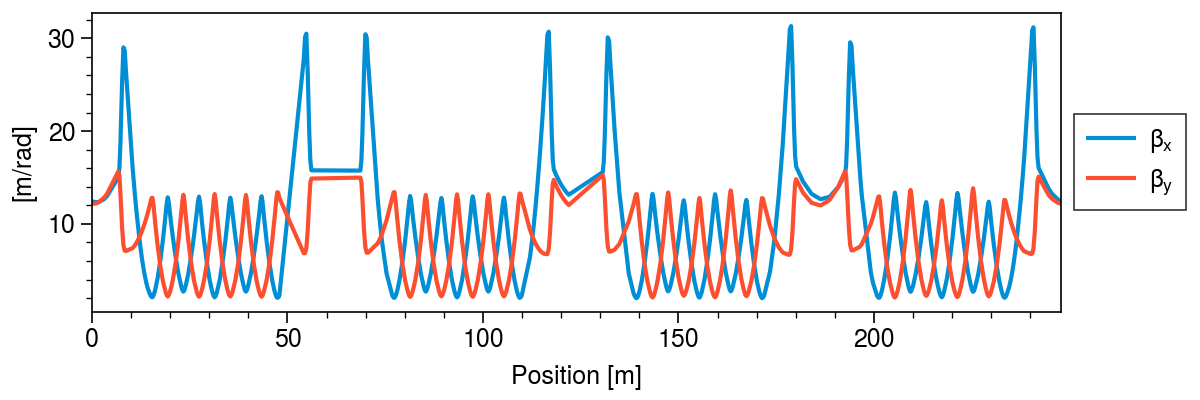

In [6]:
fig, ax = pplt.subplots(figsize=(6, 2))
ax.plot(twiss["s"], twiss["beta_x"], label=r"$\beta_x$")
ax.plot(twiss["s"], twiss["beta_y"], label=r"$\beta_y$")
ax.legend(loc="right", ncols=1)
ax.format(xlabel="Position [m]", ylabel="[m/rad]")

### Coupled

In [7]:
file = open(os.path.join(datadir, "lattice_params_coupled.pkl"), "rb")
lattice_params_coupled = pickle.load(file, encoding="latin1")
file.close()

pprint(lattice_params_coupled)

{'M': array([[ 5.14920817e-01,  1.11482410e+01,  1.43310082e-02,
         3.90576372e-01,  0.00000000e+00, -8.97695590e-02,
         0.00000000e+00],
       [-7.21237690e-02,  3.69771363e-01, -7.88608929e-03,
         1.71917435e-01,  0.00000000e+00, -4.18986126e-03,
         0.00000000e+00],
       [-8.70195983e-02, -1.83949217e+00,  4.58743538e-01,
         1.09030532e+01,  0.00000000e+00,  3.69316196e-03,
         0.00000000e+00],
       [ 7.28985164e-03,  9.03906115e-02, -7.32165819e-02,
         4.27628561e-01,  0.00000000e+00,  2.44272665e-06,
         0.00000000e+00],
       [ 1.28507685e-02,  2.05599384e-02,  7.36776351e-04,
        -1.81707708e-02,  1.00000000e+00,  3.30399485e+01,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.0

These might be wrong.

In [8]:
filename = os.path.join(datadir, "lattice_twiss_coupled.dat")
twiss_coupled = pd.read_table(filename, sep=" ", index_col=0)
twiss_coupled

,s,beta_1x,beta_1y,beta_2x,beta_2y,alpha_1x,alpha_1y,alpha_2x,alpha_2y,u,nu1,nu2
0,0.000000,1.566787,6.672547,6.652847,1.149864,0.241296,0.014828,0.002076,-0.203434,0.900497,-3.141593,-0.000000
1,0.883004,1.491677,6.675362,6.678243,1.220815,0.228533,-0.018016,-0.030837,0.216318,0.887611,-3.141593,-3.141593
2,1.378195,1.454384,6.702325,6.713864,1.267727,0.223069,-0.036435,-0.041967,-0.223829,0.883489,-3.141593,-0.000000
3,1.873387,1.419711,6.747531,6.761344,1.319654,-0.217439,-0.054854,-0.053900,0.231502,0.879243,-0.000000,-3.141593
4,2.963570,1.362668,6.911341,6.953526,1.452101,-0.199702,-0.095405,-0.108504,-0.248841,0.860369,-0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
548,245.079850,1.893665,7.051667,6.958452,1.030226,0.284042,0.119673,0.114383,-0.167826,0.950276,-3.141593,-0.000000
549,245.511477,1.832845,6.955288,6.863659,1.038476,-0.279745,0.103618,0.105202,-0.172702,0.945511,-0.000000,-0.000000
550,247.026313,1.651107,6.726714,6.673133,1.095727,0.254028,0.047272,0.034605,-0.191467,0.914053,-3.141593,-0.000000
551,247.462433,1.608126,6.692556,6.659275,1.120793,0.246033,0.031050,0.011633,0.197347,0.904500,-3.141593,-3.141593


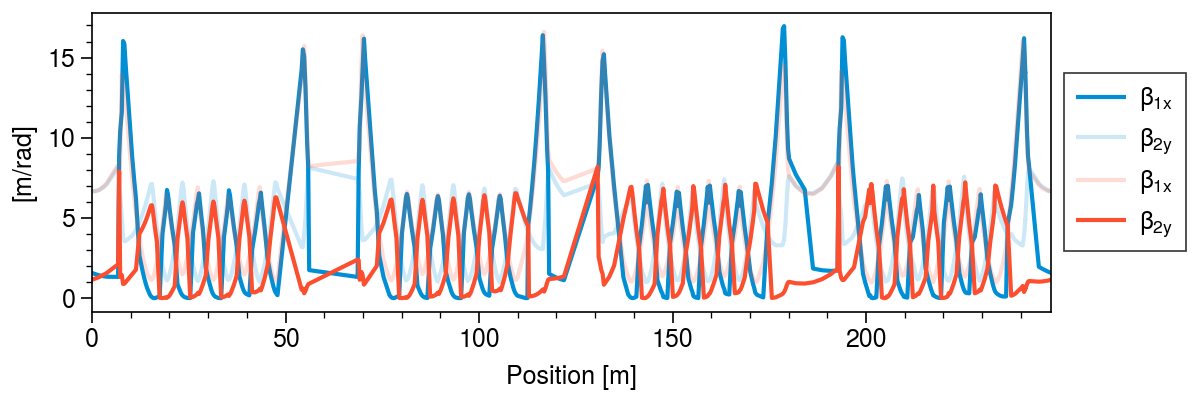

In [9]:
fig, ax = pplt.subplots(figsize=(6, 2))
_colors = pplt.Cycle("538").by_key()["color"]
ax.plot(twiss_coupled["s"], twiss_coupled["beta_1x"], label=r"$\beta_{1x}$", color=_colors[0])
ax.plot(twiss_coupled["s"], twiss_coupled["beta_1y"], label=r"$\beta_{2y}$", color=_colors[0], alpha=0.2)
ax.plot(twiss_coupled["s"], twiss_coupled["beta_2x"], label=r"$\beta_{1x}$", color=_colors[1], alpha=0.2)
ax.plot(twiss_coupled["s"], twiss_coupled["beta_2y"], label=r"$\beta_{2y}$", color=_colors[1])
ax.legend(loc="right", ncols=1)
ax.format(xlabel="Position [m]", ylabel="[m/rad]")

## Turn-by-turn coordinates 

In [10]:
os.listdir(datadir)

['track_eigenvectors.py',
 'log.txt',
 'lattice_params_uncoupled.pkl',
 'lattice_twiss.dat',
 'lattice_dispersion.dat',
 'lattice_params_coupled.pkl',
 'lattice_twiss_coupled.dat',
 'coords_mode1.dat',
 'coords_mode2.dat']

In [11]:
coords_mode1 = np.loadtxt(os.path.join(datadir, "coords_mode1.dat"))
coords_mode2 = np.loadtxt(os.path.join(datadir, "coords_mode2.dat"))
coords_mode1 *= 1000.0
coords_mode2 *= 1000.0
coords = np.array([coords_mode1, coords_mode2])
coords.shape

(2, 101, 6)

In [12]:
dims = ["x", "xp", "y", "yp"]
units = ["mm", "mrad", "mm", "mrad"]
dims_units = [f"{dim} [{unit}]" for dim, unit in zip(dims, units)]

In [13]:
dims = ["x", "xp", "y", "yp"]

@interact(
    dim1=widgets.Dropdown(options=dims, value="x"),
    dim2=widgets.Dropdown(options=dims, value="y"),
)
def update(dim1, dim2):
    axis = [dims.index(dim1), dims.index(dim2)]
    fig, ax = pplt.subplots()
    for i, label in enumerate(["mode 1", "mode 2"]):
        ax.scatter(coords[i][:, axis[0]], coords[i][:, axis[1]], s=5, label=label)
    ax.legend(loc="right", ncols=1)
    ax.format(xlabel=dims_units[axis[0]], ylabel=dims_units[axis[1]])
    pplt.show()

interactive(children=(Dropdown(description='dim1', options=('x', 'xp', 'y', 'yp'), value='x'), Dropdown(descri…

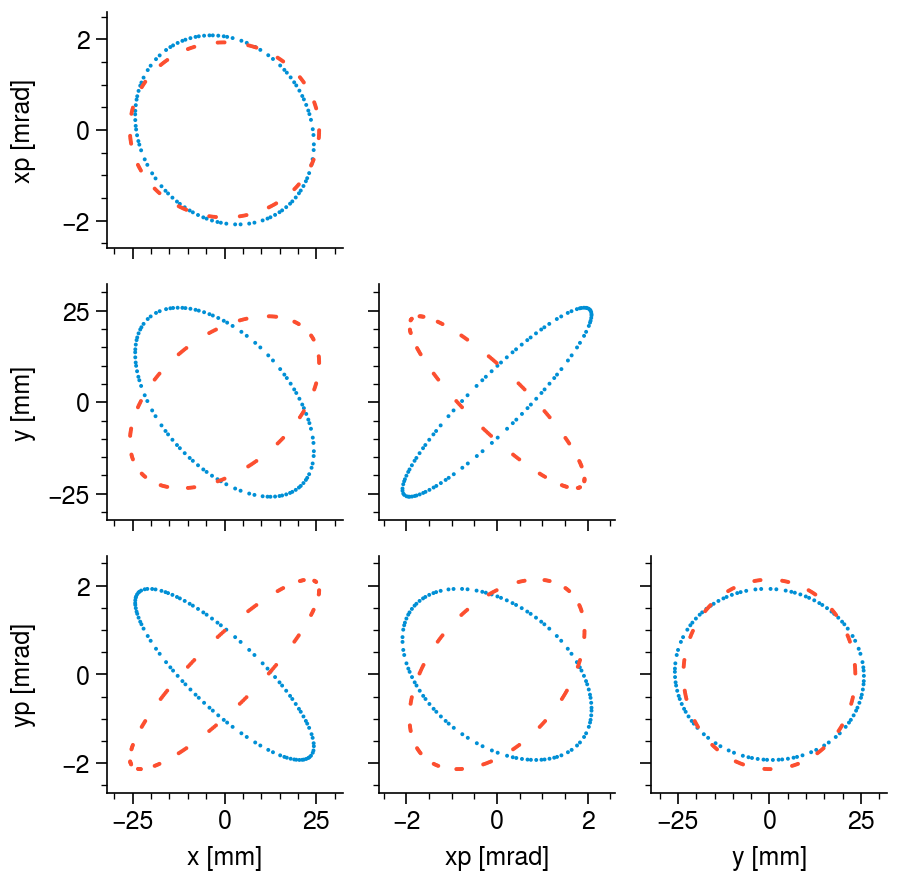

In [19]:
axis = (0, 1, 2, 3)
d = len(axis)
grid = psv.CornerGrid(d=d, diag=False, labels=dims_units)
for i in range(2):
    grid.plot_cloud(coords[i][:, axis], kind="scatter", autolim_kws=dict(pad=0.25), color=None)